In [1]:
import clip
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2 as cv
import yaml

from segment_track.fastsam_wrapper import FastSAMWrapper, mask_bounding_box

from robot_utils.robot_data import ImgData, PoseData

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
device = 'cuda'
FASTSAM_WEIGHTS = '/home/lucas/Workspace/fastsam3d/FastSAM/weights/FastSAM-x.pt'

In [3]:
fastsam = FastSAMWrapper(
    weights=FASTSAM_WEIGHTS,
    device=device,
)
fastsam.setup_filtering(
    clip_embedding=True,
    clip_model='ViT-B/32',
)

In [4]:
# img_data = ImgData.from_bag(
#     path="/home/lucas/Downloads/runA.bag",
#     topic="/RR08/l515/color/image_raw/compressed",
#     compressed=True
# )
# pose_data = PoseData.from_bag(
#     path="/home/lucas/Downloads/runA.bag",
#     topic="/RR08/world"
# )

In [5]:
# img = img_data.img(img_data.t0)
# img_data.show(img_data.t0)

In [6]:
# t = img_data.t0 + 1
# img_org = img_data.img(t)
# observations = fastsam.run(t, pose_data.T_WB(t), img_data.img(t))

In [7]:
# img_data.show(t)

In [8]:
# print(len(observations))

### Inspect one of the created observations ###

In [9]:
def inspect_obs(img, observations, obs_idx):
    # mask_downsampled =  observations[obs_idx].mask_downsampled
    mask = observations[obs_idx].mask.astype('uint8')
    fig, axes = plt.subplots(1,2)
    img = cv.bitwise_and(img, img, mask = mask)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    axes[0].imshow(img)
    min_col, min_row, max_col, max_row = mask_bounding_box(mask)
    img_bbox = img[min_row:max_row, min_col:max_col]
    axes[1].imshow(img_bbox)

In [10]:
# inspect_obs(img_org, observations, 0)

In [11]:
# cosine_similarity = np.zeros((len(observations), len(observations)))
# for i in range(len(observations)):
#     for j in range(len(observations)):
#         embedding_1 = observations[i].clip_embedding
#         embedding_2 = observations[j].clip_embedding
#         cosine_similarity[i, j] = np.dot(embedding_1, embedding_2)/(np.linalg.norm(embedding_1)*np.linalg.norm(embedding_2))

In [12]:
# plt.close()
# plt.imshow(cosine_similarity, vmin=cosine_similarity.min(), vmax=cosine_similarity.max(), interpolation='nearest', origin='lower')
# plt.colorbar()
# plt.show()

### Inspect segments with high similarity scores ###

In [13]:
# inspect_obs(img_org, observations, 28)

In [14]:
# inspect_obs(img_org, observations, 29)

### Investigate Different Views of Same Objects ###

In [15]:
### Pick out the cones.
# inspect_obs(img_org, observations, 7)

In [16]:
# cone_embedding = observations[7].clip_embedding

In [17]:
# t = img_data.t0 + 5
# img_next = img_data.img(t)
# observations_next = fastsam.run(t, pose_data.T_WB(t), img_data.img(t))

In [18]:
# img_data.show(t)

In [19]:
# inspect_obs(img_next, observations_next, 11)

In [20]:
# idx_diff_cone = 8 ### Index of the left cone
# idx_same_cone = 11 ### Index of the right cone

In [21]:
# cone_embeddings = [cone_embedding, observations_next[idx_diff_cone].clip_embedding, observations_next[idx_same_cone].clip_embedding]
# M = np.zeros((len(cone_embeddings), len(cone_embeddings)))
# for i in range(len(cone_embeddings)):
#     for j in range(len(cone_embeddings)):
#         M[i, j] = np.dot(cone_embeddings[i], cone_embeddings[j])/(np.linalg.norm(cone_embeddings[i])*np.linalg.norm(cone_embeddings[j]))
    

In [22]:
# plt.close()
# plt.imshow(M, vmin=M.min(), vmax=M.max(), interpolation='nearest', origin='lower')
# plt.colorbar()
# plt.show()

## Investigate KMD ##

In [23]:
with open("/home/lucas/Workspace/sparse_mapping/segment_track/demo/params/kmd_sparkal1.yaml", 'r') as f:
    params = yaml.safe_load(f)

In [24]:
img_data = ImgData.from_bag(
    path="/home/lucas/Workspace/sparse_mapping/kimera_multi_data/bags/sparkal1.bag",
    topic="/sparkal1/forward/color/image_raw/compressed",
    compressed=True
)
pose_data = PoseData.from_csv(
    path="/home/lucas/Workspace/sparse_mapping/kimera_multi_data/gt/sparkal1.csv",
    csv_options=params['pose_data']['csv_options']
)

In [25]:
img_data.t0

1665777596.8772979

<Axes: >

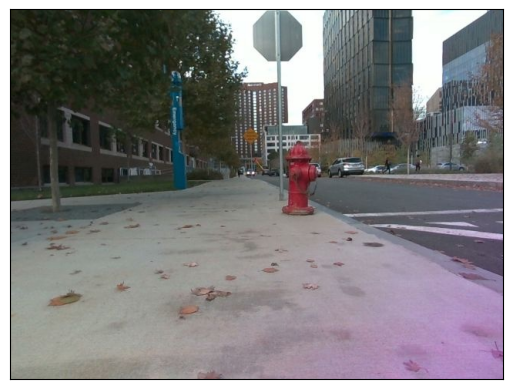

In [26]:
t = img_data.t0 + 250 + 369
img_data.show(t)

In [27]:
observations = fastsam.run(t, pose_data.T_WB(t), img_data.img(t))


0: 768x1024 34 objects, 136.6ms
Speed: 4.7ms preprocess, 136.6ms inference, 98.9ms postprocess per image at shape (1, 3, 1024, 1024)


Mask shape:  (480, 640)
Mean coord:  [     33.957      347.23]
Before processing:  0 67 316 379
After processing:  0 67 315 379
Img shape:  (480, 640, 3)
Bbox:  0 67 315 379
Mask shape:  (480, 640)
Mean coord:  [     222.71      375.41]
Before processing:  173 266 354 398
After processing:  175 269 353 397
Img shape:  (480, 640, 3)
Bbox:  175 269 353 397
Mask shape:  (480, 640)
Mean coord:  [     204.55       436.3]
Before processing:  193 218 414 459
After processing:  191 217 413 459
Img shape:  (480, 640, 3)
Bbox:  191 217 413 459
Mask shape:  (480, 640)
Mean coord:  [      139.2      394.73]
Before processing:  117 161 380 407
After processing:  117 161 380 408
Img shape:  (480, 640, 3)
Bbox:  117 161 380 408
Mask shape:  (480, 640)
Mean coord:  [     159.19      217.13]
Before processing:  81 233 208 229
After processing:  83 235 206 228
Img shape:  (480, 640, 3)
Bbox:  83 235 206 228
Mask shape:  (480, 640)
Mean coord:  [     59.931      348.19]
Before processing:  0 246 317 379


In [28]:
len(observations)

34

Mask shape:  (480, 640)
Mean coord:  [     59.931      348.19]
Before processing:  0 246 317 379
After processing:  0 182 317 379


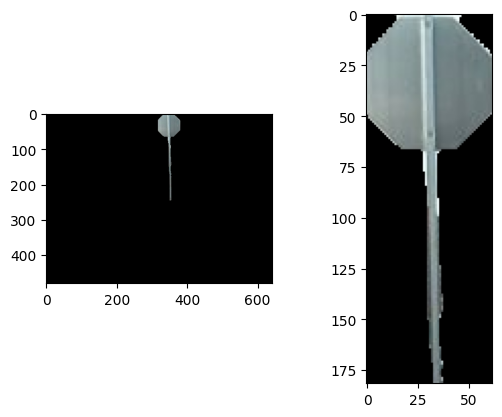

In [29]:
inspect_obs(img_data.img(t), observations, 5)

In [30]:
safety_sign_embedding_1 = observations[5].clip_embedding

In [31]:
with open("/home/lucas/Workspace/sparse_mapping/segment_track/demo/params/kmd_sparkal2.yaml", 'r') as f:
    params = yaml.safe_load(f)
img_data_sparkal2 = ImgData.from_bag(
    path="/home/lucas/Workspace/sparse_mapping/kimera_multi_data/bags/sparkal2.bag",
    topic="/sparkal2/forward/color/image_raw/compressed",
    compressed=True
)
pose_data_sparkal2 = PoseData.from_csv(
    path="/home/lucas/Workspace/sparse_mapping/kimera_multi_data/gt/sparkal2.csv",
    csv_options=params['pose_data']['csv_options']
)

<Axes: >

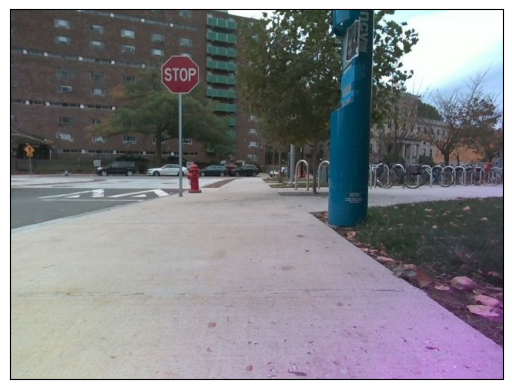

In [32]:
t = img_data_sparkal2.t0 + 300 + 250
img_data_sparkal2.show(t)

In [34]:
pose_data_sparkal2.time_tol = 10.0

In [ ]:
observations_sparkal2 = fastsam.run(t, pose_data_sparkal2.T_WB(t), img_data_sparkal2.img(t))

Mask shape:  (480, 640)
Mean coord:  [     108.01      220.68]
Before processing:  61 242 197 244
After processing:  17 199 196 244


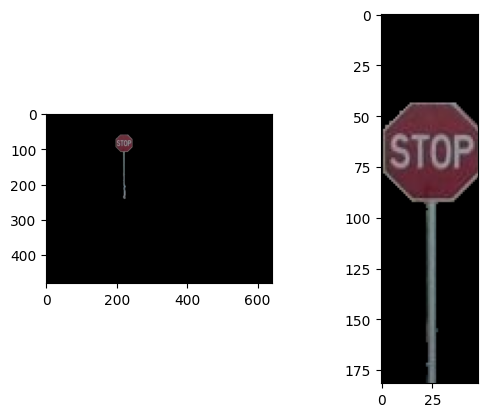

In [36]:
inspect_obs(img_data_sparkal2.img(t), observations_sparkal2, 1)

In [37]:
safety_sign_embedding_2 = observations_sparkal2[1].clip_embedding

In [38]:
print("Safety sign cosine similarity: ", np.dot(safety_sign_embedding_1, safety_sign_embedding_2) / (np.linalg.norm(safety_sign_embedding_1) * np.linalg.norm(safety_sign_embedding_2)))

Safety sign cosine similarity:  0.7837
